# Numpy로 이미지 데이터 다루기

In [2]:
# !pip install matplotlib koreanize-matplotlib

In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import koreanize_matplotlib
import pandas as pd

# 이미지 불러오기

In [5]:
img = Image.open("./data/sample00.jpg")
img_arr = np.array(img)
print("배열 타입: ", type(img_arr))
print("배열 shape: ", img_arr.shape)
print("배열 요소의 데이터 타입: ", img_arr.dtype)
print("배열 타입: ", img_arr.ndim)

배열 타입:  <class 'numpy.ndarray'>
배열 shape:  (1000, 1000, 3)
배열 요소의 데이터 타입:  uint8
배열 타입:  3


In [6]:
img_data = pd.DataFrame(img_arr[:,:,0])

In [7]:
img_data

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,12,12,12,12,12,12,12,12,14,14,...,12,12,12,12,12,12,12,12,12,12
1,12,12,12,12,12,12,12,12,14,14,...,12,12,12,12,12,12,12,12,12,12
2,12,12,12,12,12,12,12,12,14,14,...,12,12,12,12,12,12,12,12,12,12
3,12,12,12,12,12,12,12,12,14,14,...,12,12,12,12,12,12,12,12,12,12
4,12,12,12,12,12,12,12,12,14,14,...,12,12,12,12,12,12,12,12,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
996,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
997,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
998,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12


In [8]:
img_data.to_csv("./data/img_data_00.csv", index=False, encoding="utf-8-sig")

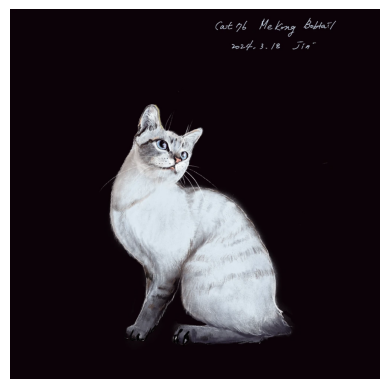

In [11]:
plt.imshow(img_arr)
plt.axis('off')
plt.show()

# 이미지 조작하기

배열 타입:  <class 'numpy.ndarray'>
배열 shape:  (505, 1000, 3)
배열 요소의 데이터 타입:  uint8
배열 타입:  3


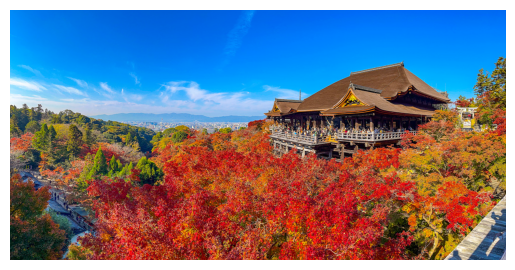

In [12]:
img = Image.open("./data/sample1.jpg")
img_arr = np.array(img)
print("배열 타입: ", type(img_arr))
print("배열 shape: ", img_arr.shape)
print("배열 요소의 데이터 타입: ", img_arr.dtype)
print("배열 타입: ", img_arr.ndim)
plt.imshow(img_arr)
plt.axis('off')
plt.show()

In [14]:
h, w, c = img_arr.shape
print(f"높이: {h}, 넓이: {w}, 채널: {c}")

높이: 505, 넓이: 1000, 채널: 3


# 슬라이싱을 이용해서 이미지에서 일부분 잘라오기

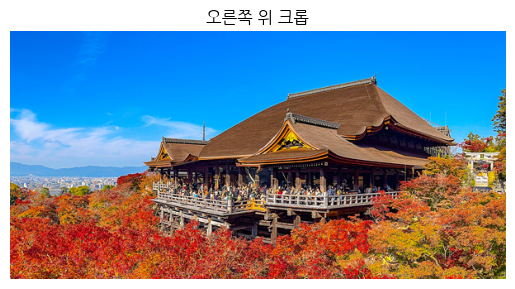

In [15]:
# h 50-350, w 350-950
crop = img_arr[50:351, 350:951]
plt.imshow(crop)
plt.axis('off')
plt.title("오른쪽 위 크롭")
plt.show()

# 이미지의 채널 별로 따로 출력하기

In [17]:
# RGB 채널 분리
R = img_arr[:,:,0]
G = img_arr[:,:,1]
B = img_arr[:,:,2]

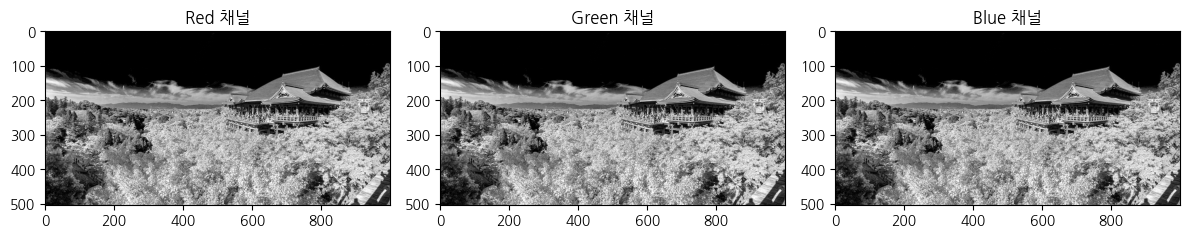

In [18]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(R, cmap='gray'); plt.title("Red 채널")
plt.subplot(1,3,2); plt.imshow(R, cmap='gray'); plt.title("Green 채널")
plt.subplot(1,3,3); plt.imshow(R, cmap='gray'); plt.title("Blue 채널")
plt.tight_layout()
plt.show()

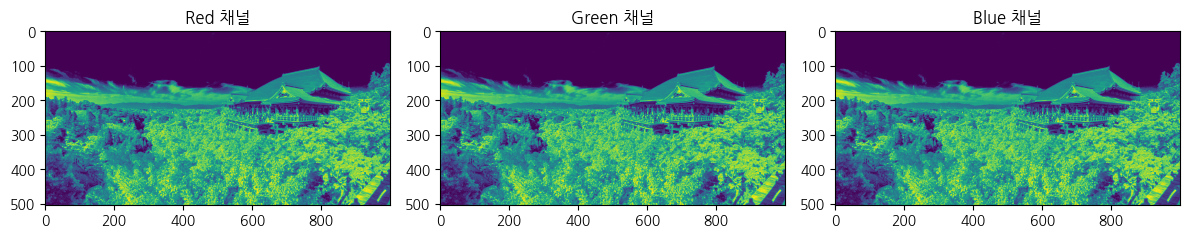

In [19]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(R); plt.title("Red 채널")
plt.subplot(1,3,2); plt.imshow(R); plt.title("Green 채널")
plt.subplot(1,3,3); plt.imshow(R); plt.title("Blue 채널")
plt.tight_layout()
plt.show()

# 채널 순서를 BGR로 바꿔보기 OpenCV

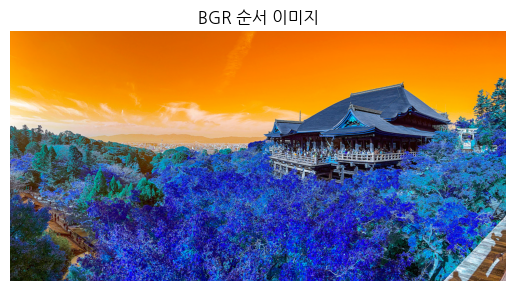

In [20]:
bgr_arr = np.dstack([B, G, R])
plt.imshow(bgr_arr)
plt.axis('off')
plt.title("BGR 순서 이미지")
plt.show()

# 브로드 캐스팅 연산으로 컬러를 흑백으로 바꾸기

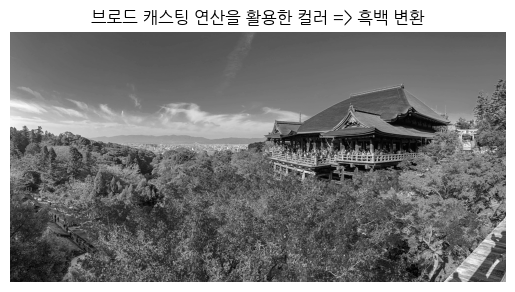

In [23]:
gray_arr = (R * 0.299 + G * 0.587 + B * 0.114).astype(np.uint8)
plt.imshow(gray_arr, cmap='gray')
plt.axis('off')
plt.title("브로드 캐스팅 연산을 활용한 컬러 => 흑백 변환")
plt.show()

# 브로드 캐스팅 연산으로 이미지 밝기/대비 조절하기

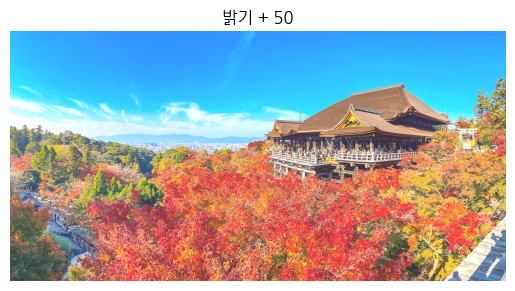

In [24]:
# 밝게 만들기 (+50)
brighter = img_arr.astype(np.int16) + 50
brighter = np.clip(brighter, 0, 255).astype(np.uint8)
plt.imshow(brighter)
plt.axis('off')
plt.title("밝기 + 50")
plt.show()

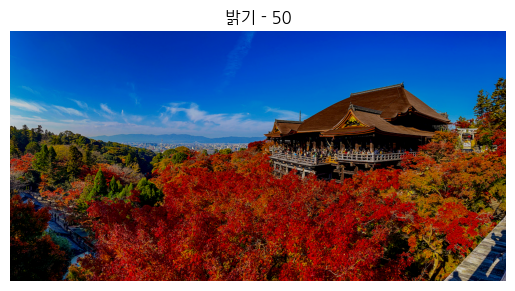

In [25]:
# 어둡게 만들기 (-50)
brighter = img_arr.astype(np.int16) - 50
brighter = np.clip(brighter, 0, 255).astype(np.uint8)
plt.imshow(brighter)
plt.axis('off')
plt.title("밝기 - 50")
plt.show()

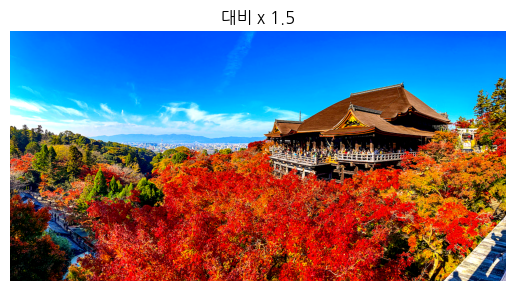

In [27]:
# 대비(contrast) 조절
alpha = 1.5 # 1보다 크면 대비 올림
contrast = (img_arr.astype(np.float32) - 128) * alpha + 128
contrast = np.clip(contrast, 0, 255).astype(np.uint8)
plt.imshow(contrast)
plt.axis('off')
plt.title("대비 x 1.5")
plt.show()